In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('income.csv')
data


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


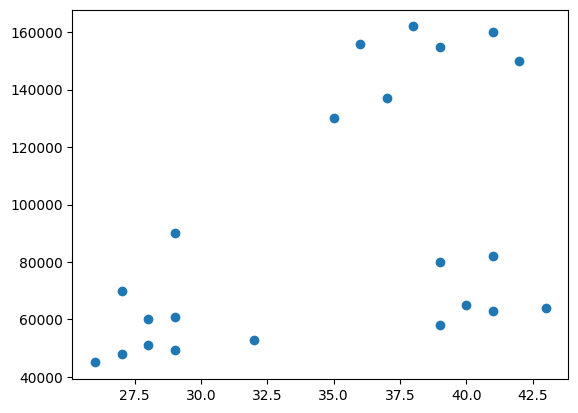

In [3]:
plt.scatter(data['Age'],data['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_pred = km.fit_predict(data[['Age','Income($)']])
y_pred

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [6]:
data["cluter"] = y_pred
data

,Name,Age,Income($),cluter
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [7]:
data1 = data[data.cluter==0]
data2 = data[data.cluter==1]
data3 = data[data.cluter==2]

C:\Users\sarth\AppData\Local\Temp\ipykernel_23536\814856290.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


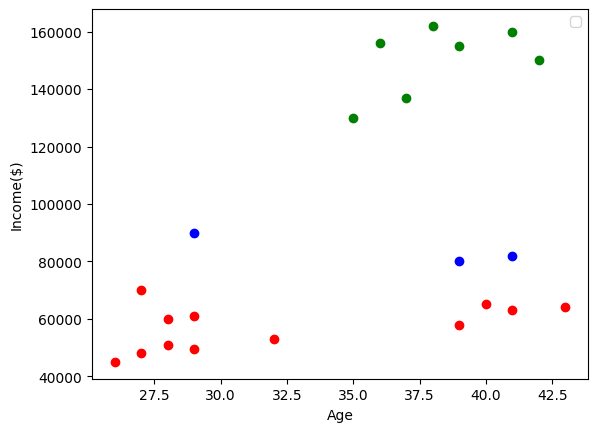

In [8]:
plt.scatter(data1['Age'],data1['Income($)'],color='green')
plt.scatter(data2['Age'],data2['Income($)'],color='red')
plt.scatter(data3['Age'],data3['Income($)'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# We haven't scale the feature so that we have not get good result

In [9]:
scaler = MinMaxScaler()
data["Income($)"] = scaler.fit_transform(data[['Income($)']])

data['Age'] = scaler.fit_transform(data[['Age']])

data.head()

,Name,Age,Income($),cluter
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [10]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(data[['Age','Income($)']])
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [11]:
data['cluter'] = y_pred
#data.drop('cluter',axis=1,inplace=True)
data

,Name,Age,Income($),cluter
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [12]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [13]:
data1 = data[data.cluter==0]
data2 = data[data.cluter==1]
data3 = data[data.cluter==2]

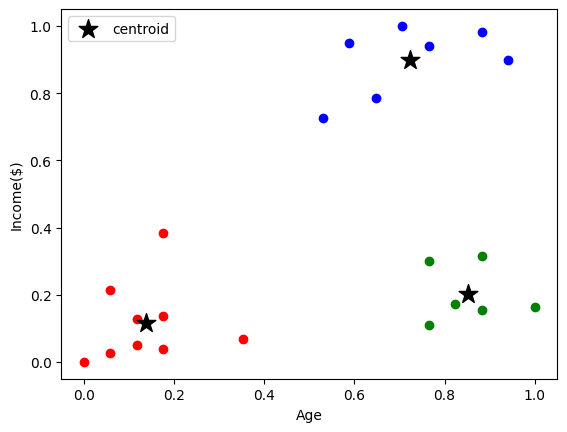

In [15]:
plt.scatter(data1['Age'],data1['Income($)'],color='green')
plt.scatter(data2['Age'],data2['Income($)'],color='red')
plt.scatter(data3['Age'],data3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid',s=200)
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [16]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

In [17]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.36986589192348335,
 0.3338113197807203,
 0.2247696122877267,
 0.19512425597363345,
 0.14417954691813864,
 0.12770456212031944]

Text(0, 0.5, 'Sum of squared error')

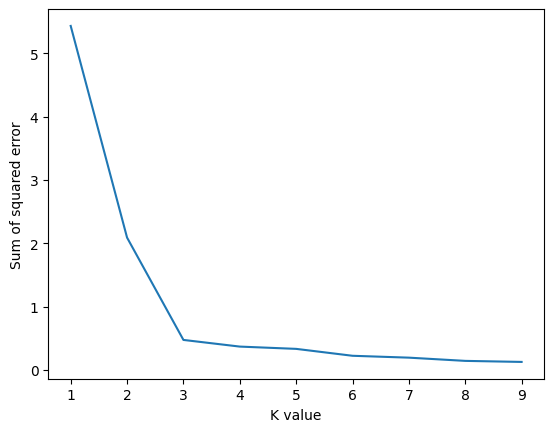

In [19]:
plt.plot(k_rng,sse)
plt.xlabel('K value')
plt.ylabel('Sum of squared error')